In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import numpy as np
plt.rcParams['font.family'] = 'SimSun'



In [34]:

# 读取数据
# data = pd.read_excel('../data/Q2_a.xlsx')
data = pd.read_excel('../data/lwj/2a.xlsx')
# 特征工程:提取时间和水肿体积
X = data[['发病到首次影像检查时间间隔']]
y = data[['ED_volume']]

# 线性回归

In [35]:

# 构建线性回归模型
lr = LinearRegression()

# 训练模型
lr.fit(X, y)

# 获取拟合的系数
print('模型Slope:', lr.coef_)
print('模型Intercept:', lr.intercept_)

# 预测水肿体积
y_pred = lr.predict(X)
residual_linear = y - y_pred
# residual_linear.__class__

模型Slope: [[-2.51136809]]
模型Intercept: [27296.37062398]


In [36]:
# 添加至最后一列
data['residual_linear'] = residual_linear
data

,发病到首次影像检查时间间隔,ED_volume,残差,residual_linear
0,2.500000,48919,21553.909057,21628.907796
1,3.000000,23526,-3837.806133,-3762.836520
2,2.000000,32621,5254.624248,5329.652112
3,1.000000,22191,-5177.945372,-5102.859256
4,5.000000,47392,20033.333106,20108.186216
...,...,...,...,...
439,1397.366111,377,-23403.815738,-23410.069966
440,975.096667,8307,-16558.887550,-16540.543973
441,242.780833,3504,-23243.660620,-23182.658587
442,240.110833,33087,6332.478496,6393.636060


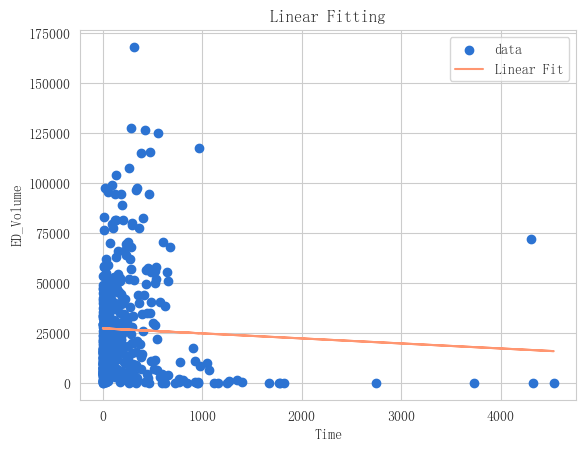

D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster 0: y=3.05x+24205.34
Cluster 0: y=3.05x+24205.34, R²=0.01, RMSE=5951.19, MAE=5220.79
Cluster 1: y=-2.91x+98489.66
Cluster 1: y=-2.91x+98489.66, R²=0.01, RMSE=20566.93, MAE=15560.71
Cluster 2: y=15.19x+46199.63
Cluster 2: y=15.19x+46199.63, R²=0.10, RMSE=8579.45, MAE=6828.55
Cluster 3: y=-2.88x+7435.58
Cluster 3: y=-2.88x+7435.58, R²=0.16, RMSE=4351.88, MAE=3756.65


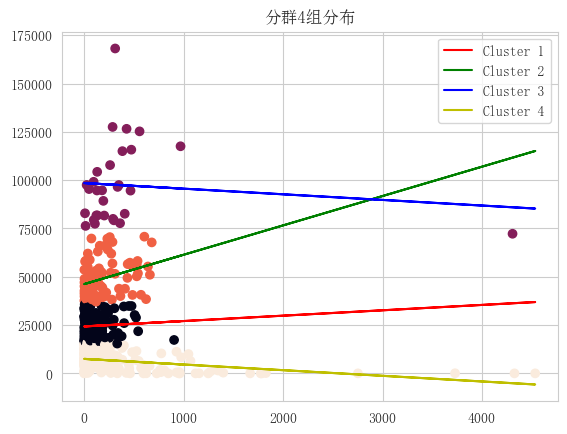

In [37]:
X = data[['发病到首次影像检查时间间隔']]
y = data[['ED_volume']]
# 可视化拟合效果
plt.scatter(X, y,color='#2C73D2',marker='o')
plt.plot(X, y_pred, color='#FF9671')
plt.xlabel('Time')
plt.ylabel('ED_Volume')
plt.title('Linear Fitting')
plt.legend(['data', 'Linear Fit'])
plt.savefig('./figs/线性拟合.png')
plt.show()

# # 绘制残差分布图
# plt.title('残差分布图')
# plt.hist(residual_linear,color='#B39CD0')
# plt.savefig('./figs/线性残差分布.png')
# plt.show()

# K-Means进行分群
kmeans = KMeans(n_clusters=4)

# 训练,获得标签
clusters = kmeans.fit_predict(residual_linear.values.reshape(-1, 1))

# 添加分群结果到原始数据
data['cluster'] = clusters



# 分析各群体大小
clusters_size = data.groupby('cluster').size()
clusters_size.to_excel('./excels/各群体大小.xlsx',index=True)


# 每组单独建模
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]
    model = LinearRegression()
    model.fit(Xi, yi)
    coef = model.coef_[0][0]  # 提取系数的标量值
    intercept = model.intercept_[0]  # 提取截距的标量值
    print(f'Cluster {i}: y={coef:.2f}x+{intercept:.2f}')


    # 使用模型进行预测
    y_pred = model.predict(Xi)

    # 计算R²、RMSE和MAE
    r2 = r2_score(yi, y_pred)
    rmse = np.sqrt(mean_squared_error(yi, y_pred))
    mae = mean_absolute_error(yi, y_pred)

    print(f'Cluster {i}: y={coef:.2f}x+{intercept:.2f}, R²={r2:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}')

# Cluster 0: y=-2.95x+7545.38
# Cluster 1: y=15.19x+46199.63
# Cluster 2: y=-2.91x+98489.66
# Cluster 3: y=2.47x+24394.40


y1 = 2.78 * X + 24297.38
y2 = 15.19 * X + 46199.63
y3 = -2.91 * X + 98489.66
y4 = -2.92 * X + 7490.39
# 绘制分群结果
plt.scatter(X, y, c=clusters)  # 散点图
plt.plot(X, y1, label='Cluster 1', c='r')  # 第一组拟合线
plt.plot(X, y2, label='Cluster 2', c='g')  # 第二组拟合线
plt.plot(X, y3, label='Cluster 3', c='b')  # 第三组拟合线
plt.plot(X, y4, label='Cluster 4', c='y')  # 第四组拟合线

plt.title('分群4组分布')
plt.legend()
plt.savefig('./figs/线性分群4组.png')
plt.show()

C:\Users\wwx\AppData\Local\Temp\ipykernel_34940\745620701.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q2高斯分布.png', dmi=400)


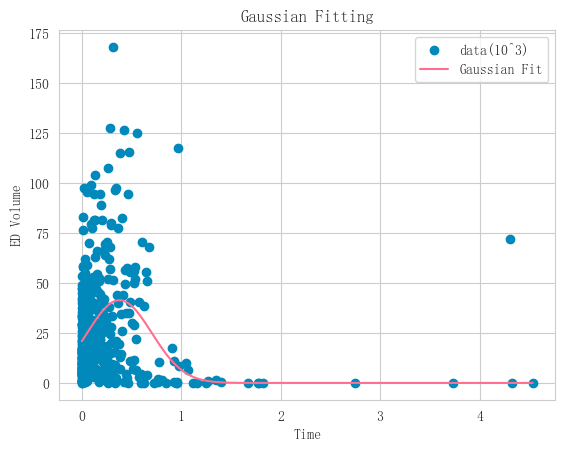

Amplitude (a): 41.38606645915592
Mean (b): 0.3787472870196032
Standard Deviation (c): -0.3238077619857282
R²: -1.03
RMSE: 37.24
MAE: 26.99


In [38]:
X = X.values.flatten()
y = y.values.flatten()

X = X/ 1000
y = y/ 1000


from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian_function(x, a, b, c):
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))


# 使用curve_fit拟合高斯函数
params, covariance = curve_fit(gaussian_function, X, y, p0=[1, np.mean(X), 1])

# 获取拟合参数
a, b, c = params

# 生成一系列x值用于绘制拟合曲线
x_fit = np.linspace(X.min(), X.max(), 444)

# 预测水肿体积
y_pred_gaussian = gaussian_function(x_fit, a, b, c)
residual__gaussian = y - y_pred_gaussian

# 可视化拟合效果，只显示一条拟合曲线和散点图
plt.scatter(X, y, color='#0089BA')
plt.plot(x_fit, y_pred_gaussian, color='#FF6F91')
plt.xlabel('Time')
plt.ylabel('ED Volume')
plt.title('Gaussian Fitting')
plt.legend(['data(10^3)', 'Gaussian Fit'])
plt.savefig('./figs/Q2高斯分布.png', dmi=400)
plt.show()

# 输出拟合的参数
# 计算R²、RMSE和MAE
r2 = r2_score(y, y_pred_gaussian)
rmse = np.sqrt(mean_squared_error(y, y_pred_gaussian))
mae = mean_absolute_error(y, y_pred_gaussian)

# 输出拟合的参数和评估指标
print(f'Amplitude (a): {a}')
print(f'Mean (b): {b}')
print(f'Standard Deviation (c): {c}')
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

In [39]:

# 预测ED_Volume
y_pred_gaussian = gaussian_function(X, a, b, c)
residual_gaussian = y - y_pred_gaussian
data['residual_gaussian'] = residual_gaussian
data

,发病到首次影像检查时间间隔,ED_volume,残差,residual_linear,cluster,residual_gaussian
0,2.500000,48919,21553.909057,21628.907796,2,27.848279
1,3.000000,23526,-3837.806133,-3762.836520,0,2.417465
2,2.000000,32621,5254.624248,5329.652112,0,11.588075
3,1.000000,22191,-5177.945372,-5102.859256,0,1.233614
4,5.000000,47392,20033.333106,20108.186216,2,26.132037
...,...,...,...,...,...,...
439,1397.366111,377,-23403.815738,-23410.069966,3,0.083223
440,975.096667,8307,-16558.887550,-16540.543973,3,0.715291
441,242.780833,3504,-23243.660620,-23182.658587,3,-34.389774
442,240.110833,33087,6332.478496,6393.636060,0,-4.674516


In [40]:

data.to_excel('./excels/线性和高斯残差对比.xlsx',index=False)

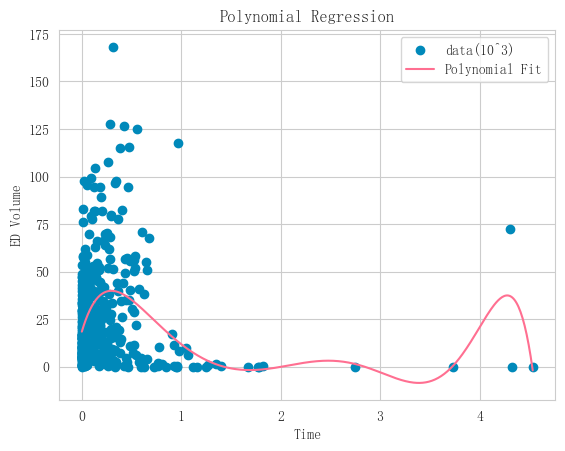

Polynomial Coefficients: [-4.15199050e-01  6.59934161e+00 -4.35385985e+01  1.59114141e+02
 -3.64522308e+02  5.44826014e+02 -4.85512442e+02  1.76833347e+02
  1.84664802e+01]
R²: 0.11
RMSE: 24.67
MAE: 18.00


In [41]:
# 多项式回归
import numpy as np
import matplotlib.pyplot as plt


# 使用numpy.polyfit进行多项式回归
degree = 8  # 指定多项式的次数，可以根据需要更改
coefficients = np.polyfit(X, y, degree)

# 使用多项式函数生成预测值
y_pred_poly = np.polyval(coefficients, x_fit)



# 可视化多项式拟合效果，只显示一条拟合曲线和散点图
plt.scatter(X, y, color='#0089BA')
plt.plot(x_fit, y_pred_poly, color='#FF6F91')
plt.xlabel('Time')
plt.ylabel('ED Volume')
plt.title('Polynomial Regression')
plt.legend(['data(10^3)', 'Polynomial Fit'])
plt.savefig('./figs/Q2多项式回归.png', dpi=400)
plt.show()



# 计算R²、RMSE和MAE
r2 = r2_score(y, y_pred_gaussian)
rmse = np.sqrt(mean_squared_error(y, y_pred_gaussian))
mae = mean_absolute_error(y, y_pred_gaussian)

# 输出拟合的参数和评估指标
print(f'Polynomial Coefficients: {coefficients}')
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

In [42]:
# y_pred_poly = y_pred_poly.shape()
print(f'y_pred_poly {y_pred_poly.shape}')
residual_poly = y - y_pred_poly
print(residual_poly)

y_pred_poly (444,)
[ 3.04525198e+01  3.29945131e+00  1.07327052e+01 -1.26408465e+00
  2.24618073e+01  7.11861967e+01  4.81598677e+00 -1.44838333e+01
 -1.11771904e+01 -1.57669298e+01 -2.69478162e+01 -1.76915366e+01
 -2.41007014e+01 -2.22868463e+01 -2.95384344e+01 -7.00085754e+00
 -2.50224382e+01 -1.32084312e+01 -2.64800250e+01 -3.78633438e+01
 -2.55574488e+01 -3.32843398e+01  3.69504327e+00 -2.99691811e+01
 -3.04178374e+01 -1.85596950e+01 -3.24934687e+01 -2.32988208e+01
  4.98863760e+00 -2.15576543e+01 -2.25812085e+01 -3.91274899e+01
 -3.82969168e+01 -2.87338626e+01 -2.42146569e+01 -2.26945866e+01
 -1.92578971e+01 -3.46267936e+01 -2.26454417e+01 -3.41339691e+01
 -3.30964660e+01 -2.50279868e+01 -1.67395506e+01 -1.12071424e+01
 -3.05277140e+01  1.00981501e+00 -3.04364437e+01 -3.14293479e+01
 -3.15527260e+01 -2.62873777e+01 -1.78830747e+01 -2.72205618e+01
 -1.70555577e+01 -2.07457556e+01 -1.75028238e+01 -2.75740697e+00
 -2.39461264e+01 -2.00365811e+01 -2.96393480e+01  3.05401697e+00
 -1.48

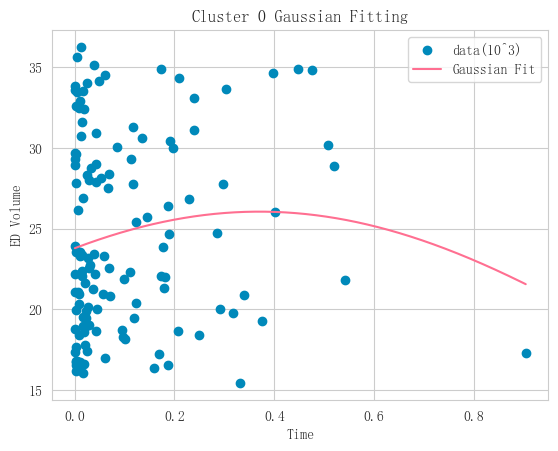

Cluster 0 Gaussian Fit Parameters:
Amplitude (a): 26.0508833256423
Mean (b): 0.36996073941697455
Standard Deviation (c): 0.8662656544460049
R²: 0.11
RMSE: 24.67
MAE: 18.00


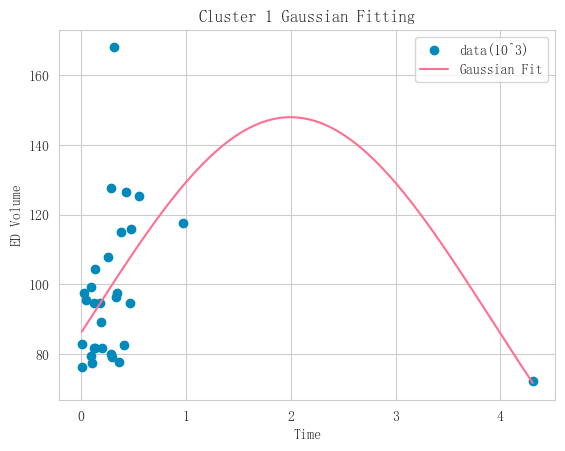

Cluster 1 Gaussian Fit Parameters:
Amplitude (a): 147.97396463756948
Mean (b): 1.9976545385371032
Standard Deviation (c): 1.919392249211366
R²: 0.11
RMSE: 24.67
MAE: 18.00


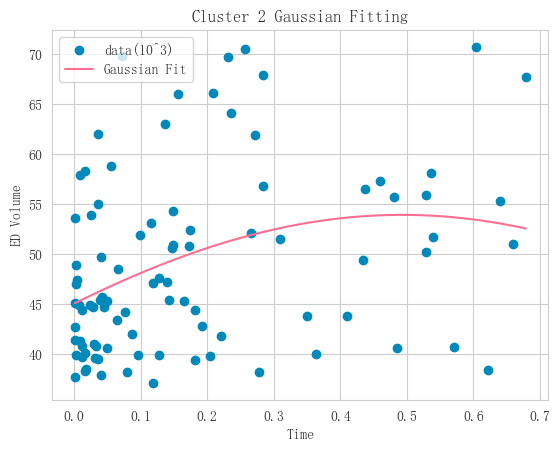

Cluster 2 Gaussian Fit Parameters:
Amplitude (a): 53.93469688379914
Mean (b): 0.49269509344040363
Standard Deviation (c): -0.8217404027510128
R²: 0.11
RMSE: 24.67
MAE: 18.00


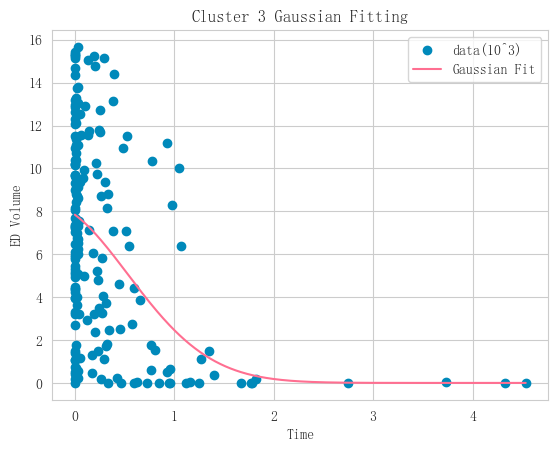

Cluster 3 Gaussian Fit Parameters:
Amplitude (a): 8.373927917635566
Mean (b): -0.30101147367119935
Standard Deviation (c): 0.8318070805197268
R²: 0.11
RMSE: 24.67
MAE: 18.00


In [43]:
# 对每个类别分别进行拟合
from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian_function(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

# 遍历每个 cluster 进行拟合和预测
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]

    # 使用curve_fit拟合高斯函数
    params, covariance = curve_fit(gaussian_function, Xi, yi, p0=[1, np.mean(Xi), 1], maxfev=5000)

    # 获取拟合参数
    a, b, c = params
    # 生成一系列x值用于绘制拟合曲线
    x_fit = np.linspace(Xi.min(), Xi.max(), 444)

    # 预测水肿体积
    y_pred_gaussian_cluster = gaussian_function(x_fit, a, b, c)
    # 将 y_pred_gaussian_cluster 转换为 DataFrame
    df_y_pred = pd.DataFrame({'ED_Volume': y_pred_gaussian_cluster})

    # 添加 cluster 列
    df_y_pred['cluster'] = i

    # 生成文件名并保存 DataFrame 到 CSV 文件
    df_y_pred.to_csv(f'./excels/ED_Volume_each_gaussian_cluster[{i}]', index=False)

    # 可视化拟合效果
    plt.scatter(Xi, yi, color='#0089BA')
    plt.plot(x_fit, y_pred_gaussian_cluster, color='#FF6F91')
    plt.xlabel('Time')
    plt.ylabel('ED Volume')
    plt.title(f'Cluster {i} Gaussian Fitting')
    plt.legend(['data(10^3)', 'Gaussian Fit'])
    plt.savefig(f'./figs/Q2_cluster{i}拟合.png')
    plt.show()

    # 输出拟合的参数
    print(f'Cluster {i} Gaussian Fit Parameters:')
    # 计算R²、RMSE和MAE
    r2 = r2_score(y, y_pred_gaussian)
    rmse = np.sqrt(mean_squared_error(y, y_pred_gaussian))
    mae = mean_absolute_error(y, y_pred_gaussian)

    # 输出拟合的参数和评估指标
    print(f'Amplitude (a): {a}')
    print(f'Mean (b): {b}')
    print(f'Standard Deviation (c): {c}')
    print(f'R²: {r2:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')


C:\Users\wwx\AppData\Local\Temp\ipykernel_34940\3995627440.py:34: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(f'./figs/Q2_poly_cluster{i}拟合.png')
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


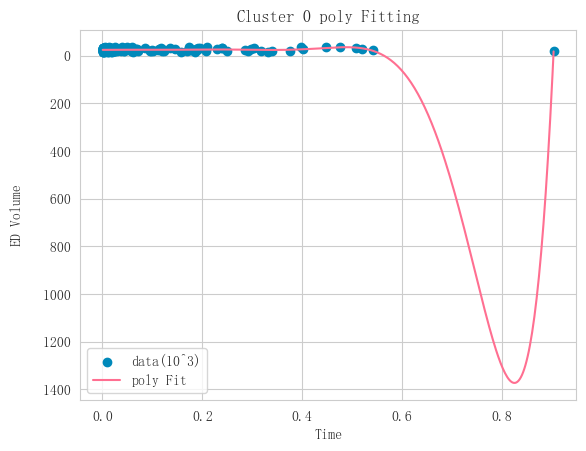

Cluster 0 poly Fit Parameters:
Amplitude (a): 8.373927917635566
Mean (b): -0.30101147367119935
Standard Deviation (c): 0.8318070805197268
R²: 0.11
RMSE: 24.67
MAE: 18.00


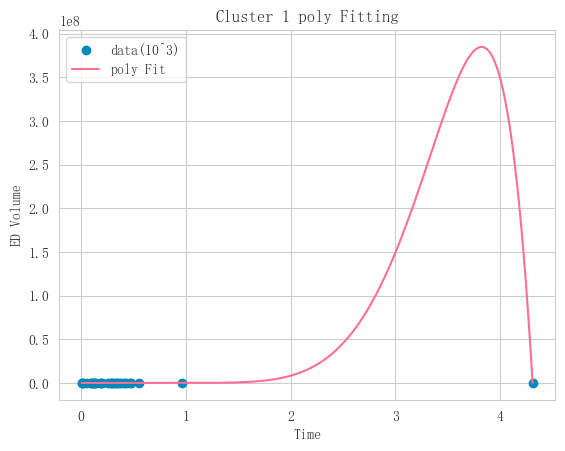

Cluster 1 poly Fit Parameters:
Amplitude (a): 8.373927917635566
Mean (b): -0.30101147367119935
Standard Deviation (c): 0.8318070805197268
R²: 0.11
RMSE: 24.67
MAE: 18.00


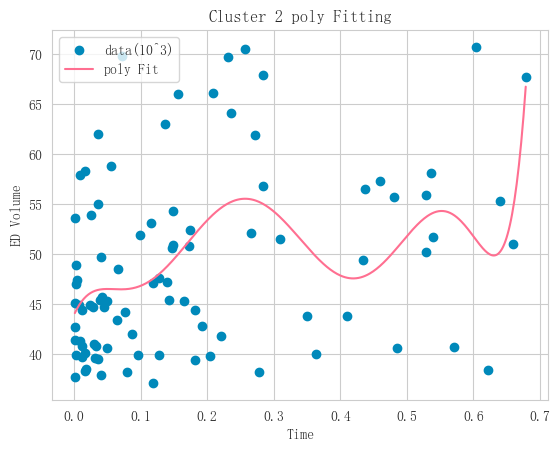

Cluster 2 poly Fit Parameters:
Amplitude (a): 8.373927917635566
Mean (b): -0.30101147367119935
Standard Deviation (c): 0.8318070805197268
R²: 0.11
RMSE: 24.67
MAE: 18.00


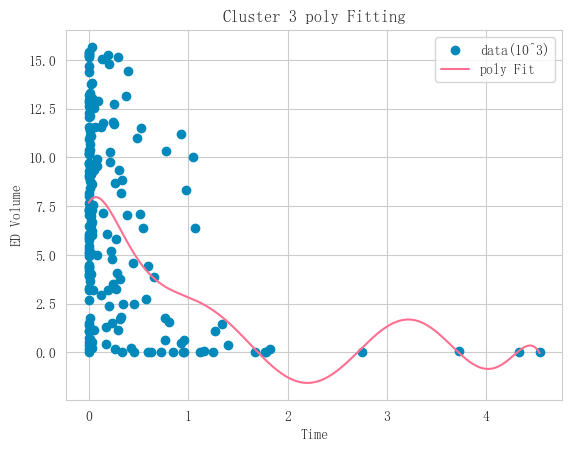

Cluster 3 poly Fit Parameters:
Amplitude (a): 8.373927917635566
Mean (b): -0.30101147367119935
Standard Deviation (c): 0.8318070805197268
R²: 0.11
RMSE: 24.67
MAE: 18.00


In [44]:



# 遍历每个 cluster 进行拟合和预测
for i in range(4):
    Xi = X[data['cluster'] == i]
    yi = y[data['cluster'] == i]
    # 生成一系列x值用于绘制拟合曲线
    x_fit = np.linspace(Xi.min(), Xi.max(), 400)

    # 使用numpy.polyfit进行多项式回归
    degree = 8  # 指定多项式的次数，可以根据需要更改
    coefficients = np.polyfit(Xi, yi, degree)

    # 使用多项式函数生成预测值
    y_pred_poly_cluster = np.polyval(coefficients, x_fit)



    # 将 y_pred_gaussian_cluster 转换为 DataFrame
    df_y_pred = pd.DataFrame({'ED_Volume': y_pred_poly_cluster})

    # 添加 cluster 列
    df_y_pred['cluster'] = i

    # 生成文件名并保存 DataFrame 到 CSV 文件
    df_y_pred.to_csv(f'./excels/ED_Volume_each_poly_cluster[{i}]', index=False)


    # 可视化拟合效果
    plt.scatter(Xi, yi, color='#0089BA')
    plt.plot(x_fit, y_pred_poly_cluster, color='#FF6F91')
    plt.xlabel('Time')
    plt.ylabel('ED Volume')
    plt.title(f'Cluster {i} poly Fitting')
    plt.legend(['data(10^3)', 'poly Fit'])
    plt.savefig(f'./figs/Q2_poly_cluster{i}拟合.png')
    plt.show()

    # 输出拟合的参数
    print(f'Cluster {i} poly Fit Parameters:')
    # 计算R²、RMSE和MAE
    r2 = r2_score(y, y_pred_gaussian)
    rmse = np.sqrt(mean_squared_error(y, y_pred_gaussian))
    mae = mean_absolute_error(y, y_pred_gaussian)

    # 输出拟合的参数和评估指标
    print(f'Amplitude (a): {a}')
    print(f'Mean (b): {b}')
    print(f'Standard Deviation (c): {c}')
    print(f'R²: {r2:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')


C:\Users\wwx\AppData\Local\Temp\ipykernel_34940\4144696478.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/三种模型残差分布三点图.png',dmi=400)
C:\Users\wwx\AppData\Local\Temp\ipykernel_34940\4144696478.py:26: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('./figs/三种模型残差分布三点图.png',dmi=400)
D:\DevHome\Environment\anaconda\envs\myself_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


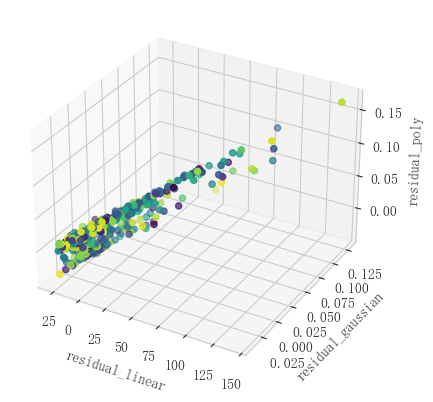

In [45]:
# 绘制三维散点图
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# 创建三个示例数据列表
x = residual_linear / 1000
y = residual_gaussian / 1000
z = residual_poly / 1000


colors = np.random.rand(444)  # 生成随机颜色值

# 创建一个三维图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制三维散点图，并指定颜色
scatter = ax.scatter(x, y, z, c=colors, cmap='viridis', marker='o')

# 设置坐标轴标签
ax.set_xlabel('residual_linear')
ax.set_ylabel('residual_gaussian')
ax.set_zlabel('residual_poly')

# 显示图形
plt.savefig('./figs/三种模型残差分布三点图.png',dmi=400)
plt.show()

# E2.c

1. 数据整合：从“表1”中提取治疗⽅法数据，并与“表2”中的⽔肿体积数据
进⾏整合。
2. 模型选择：考虑使⽤⼴义线性模型 (GLM) 或混合效应模型对数据进⾏
拟合，以考虑到患者之间的差异。
3. 模型评估：使⽤ANOVA或其他统计测试来评估模型中不同治疗⽅法的
效果。

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'

table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

In [4]:
import seaborn as sns
table = pd.merge(table1,table2,on='ID')
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\wwx\AppData\Local\Temp\ipykernel_20424\4255917391.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dmi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./figs/Q2_c_相关性分析.png', dmi=400)


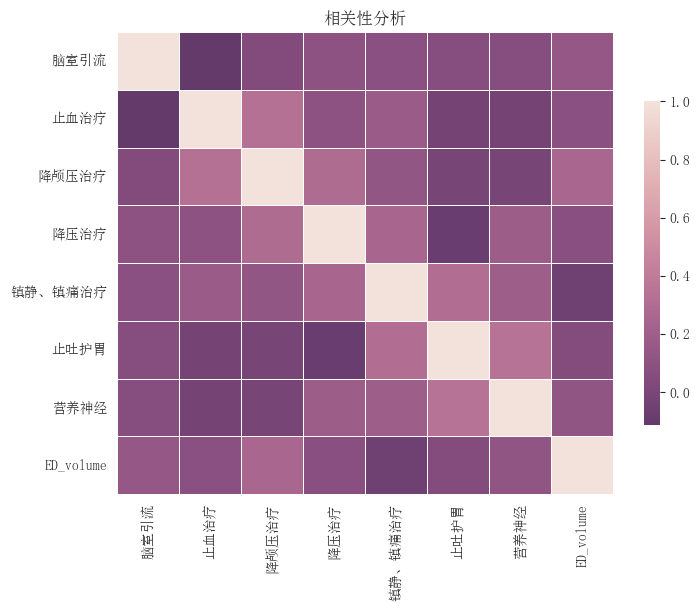

In [5]:
features = [ '脑室引流', '止血治疗', '降颅压治疗', '降压治疗','镇静、镇痛治疗', '止吐护胃', '营养神经','ED_volume']


X = table[features]
# 计算特征之间的斯皮尔曼相关性矩阵
correlation_matrix = X.corr(method='spearman')

correlation_matrix['ED_volume']


# 创建一个热力图，不显示相关性数值
plt.figure(figsize=(8, 6))
# 自定义颜色映射
cmap = sns.cubehelix_palette(as_cmap=True, dark=0.3, light=0.9, reverse=True)  # 调整dark和light参数
sns.heatmap(correlation_matrix, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title('相关性分析')
plt.savefig('./figs/Q2_c_相关性分析.png', dmi=400)
plt.show()

In [6]:
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import pandas as pd
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

table = pd.merge(table1,table2,on='ID')


features = [ '脑室引流', '止血治疗', '降颅压治疗', '降压治疗','镇静、镇痛治疗', '止吐护胃', '营养神经']

y_1_table = table.dropna(subset=['ED_volume.1'], inplace=False)
y = y_1_table['ED_volume.1'] - y_1_table['ED_volume']
X = y_1_table[features]
table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 使用混合效应模型对数据拟合，以考虑到患者之间的差异
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 重命名列名为英文
table = table.rename(columns={
    '脑室引流': 'brain_drainage',
    '止血治疗': 'hemostasis',
    '降颅压治疗': 'intracranial_pressure_reduction',
    '降压治疗': 'hypotensive_treatment',
    '镇静、镇痛治疗': 'sedation_analgesia',
    '止吐护胃': 'antiemetic_gastroprotection',
    '营养神经': 'nutritional_support',
    'ED_volume': 'ED_volume'
})

# 定义混合效应模型公式
formula = 'ED_volume ~ brain_drainage + hemostasis + intracranial_pressure_reduction + hypotensive_treatment + sedation_analgesia + antiemetic_gastroprotection + nutritional_support'

# 拟合混合效应模型，以'patient_id'作为分组变量
model = sm.MixedLM.from_formula(formula, data=table, groups=table['ED_volume'])
results = model.fit()

# 打印模型摘要
print(results.summary())
with open('./logs/Mixed Linear Model Regression Results.txt', 'w') as file:
    file.write(results.summary().as_text())


                           Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            ED_volume   
No. Observations:            160                Method:                        REML        
No. Groups:                  159                Scale:                         1187952.5229
Min. group size:             1                  Log-Likelihood:                -1676.4576  
Max. group size:             2                  Converged:                     Yes         
Mean group size:             1.0                                                           
-------------------------------------------------------------------------------------------
                                    Coef.       Std.Err.    z    P>|z|   [0.025     0.975] 
-------------------------------------------------------------------------------------------
Intercept                            1754.197    6874.802  0.255 0.799 -11720.167 15228.561
brain_drainage 

In [6]:
#多元回归分析
import statsmodels.api as sm

# 添加截距列
X = sm.add_constant(X)  # 这将在X矩阵中添加一个截距列

# 拟合多元线性回归模型
model_sm = sm.OLS(y, X).fit()

# 打印回归分析摘要
print(model_sm.summary())
with open('./logs/OLS Regression Results.txt', 'w',encoding='utf8') as file:
    file.write(model_sm.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.530
Date:                Mon, 25 Sep 2023   Prob (F-statistic):             0.0183
Time:                        20:14:50   Log-Likelihood:                -1394.7
No. Observations:                 130   AIC:                             2805.
Df Residuals:                     122   BIC:                             2828.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2467.8280   5891.004     -0.419      0.6

## E2.d
1. 数据整合：将“表1”和“表2”中的数据整合到⼀个数据框中。
2. 模型选择：使⽤多重回归分析来探索⾎肿体积、⽔肿体积和各种治疗
⽅法之间的关系。
3. 模型评估：使⽤F统计量、t统计量和R-squared值来评估模型的质量和
单个系数的显著性。

In [7]:
table1 = pd.read_excel('../data/表1-患者列表及临床信息.xlsx')
table2 = pd.read_excel('../data/表2-患者影像信息血肿及水肿的体积及位置.xlsx')

table_d = pd.merge(table1,table2,on='ID')
table_d.to_excel(f'Q2d)_table_temp.xlsx',index=False)

In [8]:
Q2d_table = pd.read_excel('./excels/Q2d)_table_temp.xlsx')
Q2d_table

,ID,90天mRS,数据集划分,入院首次影像检查流水号,年龄,性别,脑出血前mRS评分,高血压病史,卒中病史,糖尿病史,...,ED_ACA_R_Ratio.8,ED_MCA_R_Ratio.8,ED_PCA_R_Ratio.8,ED_Pons_Medulla_R_Ratio.8,ED_Cerebellum_R_Ratio.8,ED_ACA_L_Ratio.8,ED_MCA_L_Ratio.8,ED_PCA_L_Ratio.8,ED_Pons_Medulla_L_Ratio.8,ED_Cerebellum_L_Ratio.8
0,sub001,4.0,训练,20161212002136,43,女,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub002,0.0,训练,20160406002131,58,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub003,5.0,训练,20160413000006,78,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub004,4.0,训练,20161215001667,70,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub005,3.0,训练,20161222000978,51,男,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,sub156,NaN,测试2,20200306000927,87,女,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,sub157,NaN,测试2,20201009003102,52,男,2,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,sub158,NaN,测试2,20200410001952,57,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,sub159,NaN,测试2,20200218000582,47,男,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#使⽤多重回归分析来探索⾎肿体积、⽔肿体积和各种治疗 ⽅法之间的关系。
features = [ '脑室引流', '止血治疗', '降压治疗','镇静、镇痛治疗']
HM_v = Q2d_table['HM_volume']
ED_v = Q2d_table['ED_volume']
therapeutic_methods = Q2d_table[features]

In [10]:
# 多元线性回归
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [11]:
# 创建一个包含自变量和因变量的DataFrame
data = pd.DataFrame({'HM_v': HM_v, 'ED_v': ED_v, 'therapeutic_methods': therapeutic_methods['脑室引流'],})

# 添加常数项（截距）到自变量
X = sm.add_constant(data[['HM_v', 'ED_v']])

# 因变量
Y = data['therapeutic_methods']

# 创建一个多元线性回归模型
model = sm.OLS(Y, X).fit()

# 获取回归结果摘要
summary = model.summary()

# 打印回归结果摘要
print(summary)
with open('./logs/Q2d OLS Regression Results.txt', 'w',encoding='utf8') as file:
    file.write(model_sm.summary().as_text())

                             OLS Regression Results                            
Dep. Variable:     therapeutic_methods   R-squared:                       0.088
Model:                             OLS   Adj. R-squared:                  0.077
Method:                  Least Squares   F-statistic:                     7.592
Date:                 Mon, 25 Sep 2023   Prob (F-statistic):           0.000712
Time:                         20:14:57   Log-Likelihood:                 7.3258
No. Observations:                  160   AIC:                            -8.652
Df Residuals:                      157   BIC:                            0.5739
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0232      0.029     -0.79